In [2]:
# Importing
import theano.tensor as T
import sys, os
sys.path.append("../GeMpy")
sys.path.append("../pygeomod")

import GeMpy_core
import Visualization

import importlib
importlib.reload(GeMpy_core)
importlib.reload(Visualization)
import numpy as np
import pandas as pn
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

%matplotlib inline
#%matplotlib notebook

In [3]:
carbonates = GeMpy_core.GeMpy()

In [9]:
carbonates.import_data( 3405750.7,3486330.0,5816244.1,5906512.6,-4917.7, -3118.861398, 100,100,100,
                                     path_f = None,
                                     path_i = os.pardir+"/input_data/wells2_1711.csv",  sep = ",")

carbonates.Data.Foliations = pn.DataFrame(np.array([3445063.98, 5863089.02, -3778.800000,90,0,1,1]).reshape(1,7),
                                          columns=['X', 'Y', 'Z', 'dip', 'azimuth', 'polarity', 'formation'])
carbonates.Data.Foliations["formation"] = "Top"
carbonates.Data.Foliations["series"] = "Deafult"
carbonates.Data.calculate_gradient()
carbonates.Data.Interfaces[["Z"]].max()

Z   -3418.861398
dtype: float64

In [5]:
carbonates.update_data()

In [6]:
# Create a class Grid so far just regular grid
carbonates.create_grid()
carbonates.Grid.grid

array([[ 3435750.75    ,  5846244.      ,    -4717.700195],
       [ 3435750.75    ,  5846244.      ,    -4704.580566],
       [ 3435750.75    ,  5846244.      ,    -4691.460938],
       ..., 
       [ 3466330.      ,  5886512.5     ,    -3445.100586],
       [ 3466330.      ,  5886512.5     ,    -3431.980957],
       [ 3466330.      ,  5886512.5     ,    -3418.861328]], dtype=float32)

## Plotting raw data

/home/miguel/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/miguel/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


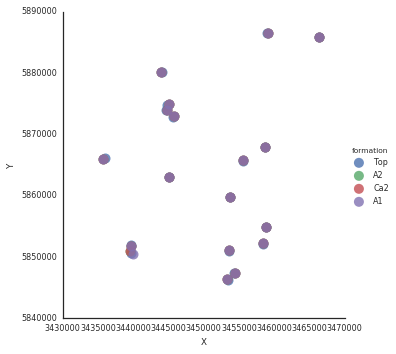

In [7]:
carbonates.Plot.plot_data(direction="z")

In [149]:
# Learn about API authentication here: https://plot.ly/pandas/getting-started
# Find your api_key here: https://plot.ly/settings/api

import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
df = carbonates.Data.Interfaces
df.head()

data = []
clusters = []
#colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

for i in range(len(df['formation'].unique())):
    name = df['formation'].unique()[i]
  
    x = df[ df['formation'] == name ]['X']
    y = df[ df['formation'] == name ]['Y']
    z = df[ df['formation'] == name ]['Z']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3,  line=dict(width=0) ) )
    data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='MAx dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.2 ),
        aspectmode = 'automatic'        
    ),
)

fig = dict(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Max data', validate=False)

In [23]:
carbonates.set_interpolator(u_grade = 0)

In [24]:
# Reset the block
carbonates.Interpolator.block.set_value(np.zeros_like(carbonates.Grid.grid[:,0]))

# Compute the block
carbonates.Interpolator.compute_block_model([0], verbose = 1)

[1 2 3 4]
[1 1 1 ..., 1 1 1] 0
The serie formations are Top|A2|Ca2|A1


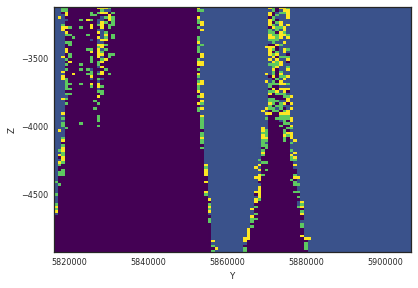

In [25]:
carbonates.Plot.plot_block_section(direction="x", aspect ="auto" )

/home/miguel/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


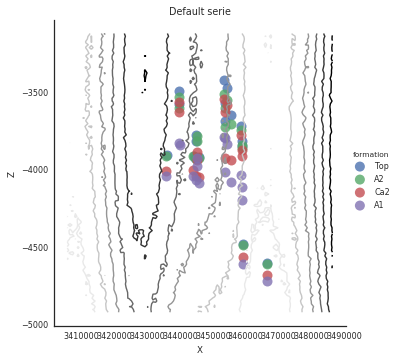

In [27]:
carbonates.Plot.plot_potential_field(50, direction="y")

In [20]:
carbonates.Interpolator.a_T.get_value()

array(121015.12922381242)